In [5]:
#libraries needed for basemap

import sys
import importlib

spam_spec = importlib.util.find_spec("mpl_toolkits.basemap")
found = spam_spec is not None

if not found:
    !apt-get install -q libgeos-3.5.0
    !apt-get install -q libgeos-dev
    !pip install -q https://github.com/matplotlib/basemap/archive/master.zip

    !pip install -q pyproj==1.9.6


from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from itertools import chain

class WorldMapColorizer:
    
    def __init__(self, projection='cyl', cmap_name='coolwarm', lat_0=0, lon_0=0, precision=0.5):
        self.cmap_name = cmap_name
        self.projection = projection
        self.lat_0 = lat_0
        self.lon_0 = lon_0
        self.precision = precision


    def draw_map(self, m, scale=0.2):
        # draw a shaded-relief image
        #m.shadedrelief(scale=scale)
        
        # lats and longs are returned as a dictionary
        arr1 = [-89.75 + i * self.precision for i in range(360)]
        arr2 = [-179.75 + i * self.precision for i in range(720)]
        #lats = m.drawparallels(arr1)
        #lons = m.drawmeridians(arr2)

        # keys contain the plt.Line2D instances
        #lat_lines = chain(*(tup[1][0] for tup in lats.items()))
        #lon_lines = chain(*(tup[1][0] for tup in lons.items()))
        #all_lines = chain(lat_lines, lon_lines)
        
        # cycle through these lines and set the desired style
        #for i, line in enumerate(all_lines):
            #print("Progessing Lines: " + str(i*100/(360+720)))
            #line.set(linestyle='-', alpha=0.3, color='w')


    def create_coordinate_array_for_rectangle(self, lat1, long1, lat2, long2):
        lats = np.linspace( lat1, lat2, 20 )
        lons = np.linspace( long1, long1, 20 )

        #second vertical line segment
        lats = np.append(lats, np.linspace( lat2, lat1, 20))
        lons = np.append(lons, np.linspace(long2, long2, 20))

        #third line element
        lats = np.append(lats, np.linspace(lat2, lat2, 20))
        lons = np.append(lons, np.linspace(long1, long2, 20))

        #fourth line element
        lats = np.append(lats, np.linspace(lat1, lat1, 20))
        lons = np.append(lons, np.linspace(long2,long1, 20))

        return(lats, lons)


    def draw_screen_poly(self, lats, lons, m, color):
        x, y = m( lons, lats )
        xy = zip(x,y)
        poly = Polygon( list(xy), facecolor=color, alpha=1.0 )
        plt.gca().add_patch(poly)


    def colorize_rectangles_from_dataset(self, crops, crop_index, base_map, offset=0.5):
        """
        Method to colorize different rectangles on the worldmap using a heatmap.
        Heatmap depends on the yield in the different areas.
        Input: 3D array over lats & longs (360*720 - so 0.5 degree precision)
            third dimension is considered the yield for the different crops
            the number of crops is defined in num_crops.
            crop_index determines, which crop is supposed to be colorized
        """

        if crop_index < 0 or crop_index >=crops.shape[2]:
            print("The crop index is larger than the number of crops in the array")
            return
        

        coolwarm_map = plt.cm.get_cmap(self.cmap_name)

        polygons = []

        # normalize data between 0 and 1 -> divide by maximum yield
        max_yield = np.max(crops[:,:,crop_index]) # get max value for specified crop
        min_yield = np.min(crops[:,:,crop_index])

        print("Min yield: " + str(min_yield) + " Max: " + str(max_yield))
        
        sys.stdout.flush()  

        for x in range(crops.shape[0]):
            print("Colorization progess: " + str(x*100/(180/self.precision)))
            for y in range(crops.shape[1]):
                lat = -89.75 + x * self.precision
                long = -179.75 + y * self.precision
                #if lat < -90 or lat + self.precision > 90 or long < -180 or long + self.precision > 180:
                    #print("Latitude: " + str(lat) + " Longitude: " + str(long)) 

                #TODO: latitude and longitude overflow possible. check it.

                crop_val = crops[x,y, crop_index]
                #if np.isnan(crop_val):
                #    continue
                cmap_val = crop_val/max_yield #normalized
                lats, lons = self.create_coordinate_array_for_rectangle(lat1=lat, long1=long, lat2=lat+self.precision, long2=long+self.precision)
                self.draw_screen_poly(lats, lons, base_map, color=coolwarm_map(cmap_val))
 

    def populate_worldmap(self, crop_yields, crop_index):
        #randoms = np.random.uniform(0, 1.0, size=(360, 720, 1))
        fig = plt.figure(figsize=(64, 64))
        map = Basemap(projection=self.projection, resolution='l',
                    lat_0=self.lat_0, lon_0=self.lon_0)
        
        map.drawcoastlines(linewidth=0.25)
        map.drawcountries(linewidth=0.25)
        map.fillcontinents(color='white',lake_color='white')
        # draw the edge of the map projection region (the projection limb)
        map.drawmapboundary(fill_color='aqua')
        
        cmap = plt.cm.get_cmap(self.cmap_name)

        self.colorize_rectangles_from_dataset(crop_yields, 0, map)
        self.draw_map(map)

Mounted at /content/drive
Min yield: 0.0 Max: 15.636003
Penis)
Colorization progess: 0.0
Colorization progess: 0.2777777777777778
Colorization progess: 0.5555555555555556
Colorization progess: 0.8333333333333334
Colorization progess: 1.1111111111111112
Colorization progess: 1.3888888888888888
Colorization progess: 1.6666666666666667
Colorization progess: 1.9444444444444444
Colorization progess: 2.2222222222222223
Colorization progess: 2.5
Colorization progess: 2.7777777777777777
Colorization progess: 3.0555555555555554
Colorization progess: 3.3333333333333335
Colorization progess: 3.611111111111111
Colorization progess: 3.888888888888889
Colorization progess: 4.166666666666667
Colorization progess: 4.444444444444445
Colorization progess: 4.722222222222222
Colorization progess: 5.0
Colorization progess: 5.277777777777778
Colorization progess: 5.555555555555555
Colorization progess: 5.833333333333333
Colorization progess: 6.111111111111111
Colorization progess: 6.388888888888889
Coloriza

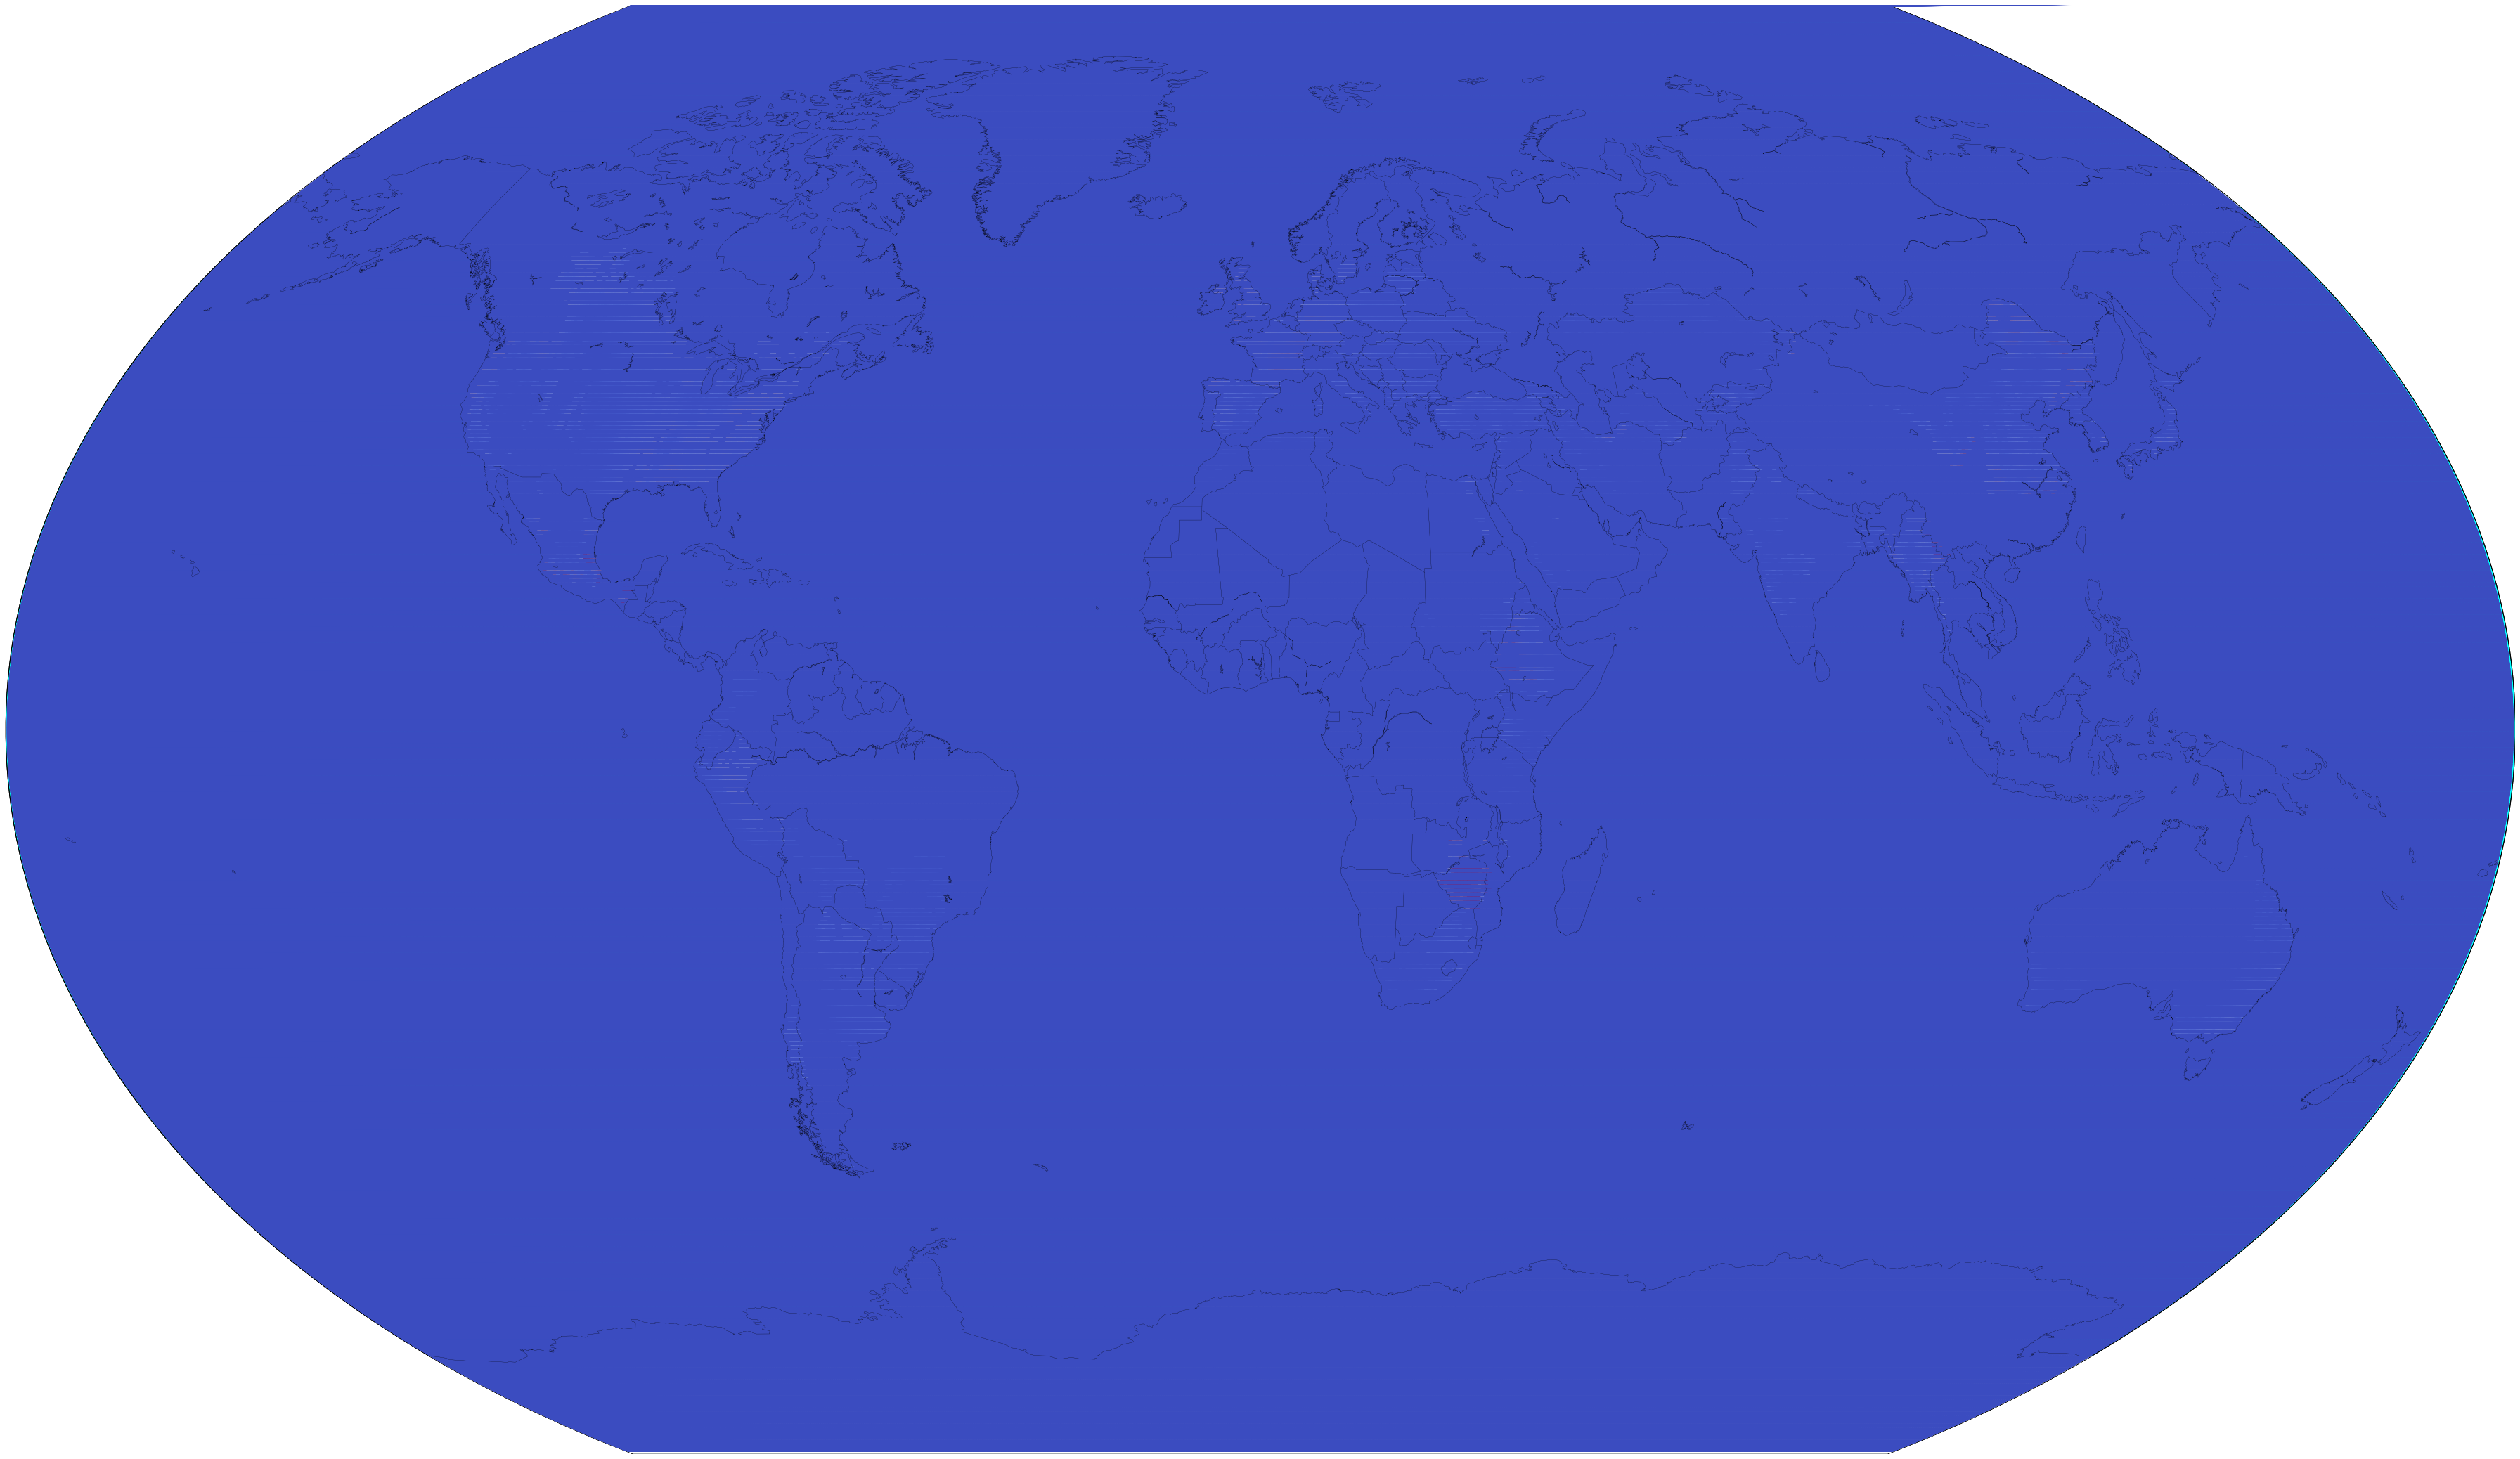

In [11]:
from google.colab import drive
import pandas as pd
import os
import numpy as np

drive.mount('/content/drive', force_remount=True)
os.chdir("/content/drive/My Drive")

randoms_5 = np.random.uniform(0, 1.0, size=(36, 72, 1))
randoms_05 = np.random.uniform(0, 1.0, size=(360, 720, 1))

input_path = '/content/drive/My Drive/aivcc_cornvolution/data'
climateuos_path = os.path.join(input_path, 'climate_uos')
historic_df = pd.read_pickle(os.path.join(input_path, 'merged_data.pkl'))
year = pd.Period(2000)
temp_map = historic_df.loc[:, :, year]['wheat'].fillna(0).to_numpy().reshape(360,720,1)
temp_map = np.roll(temp_map, 360, axis=1)
temp_map


#colorizer = WorldMapColorizer(precision=5) # this can be fully adjusted.
colorizer = WorldMapColorizer(precision=0.5, projection='kav7') # this can be fully adjusted.
colorizer.populate_worldmap(crop_yields=temp_map, crop_index=0)